# Assignment 7 

Author: Adithya Swaroop, EE17B115
        

In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

In [3]:
def lowpass(R1,R2,C1,C2,G,Vi):
    s=symbols('s')
    A=Matrix([[0,0,1,-1/G],[-1/(1+s*R2*C2),1,0,0],[0,-1000,1000,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b=Matrix([0,0,0,-Vi/R1])
    V=A.inv()*b
    return A,b,V

G=1000
0.1/(6.31517023959647e-12*s**2 + 8.94551071878941e-7*s + 0.0631517023959647)


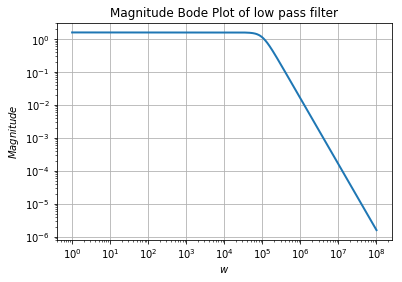

In [4]:
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1)
print('G=1000')
Vo=V[3]
Vo=simplify(Vo)
print(Vo)
w=np.logspace(0,8,801)
ss=1j*w
s=symbols('s')
hf=lambdify(s,Vo,'numpy')
v=hf(ss)
plt.loglog(w,abs(v),lw=2)
plt.xlabel("$w$")
plt.ylabel("$Magnitude$")
plt.title("Magnitude Bode Plot of low pass filter")
plt.grid(True)
plt.show()

# Questions in Assignment

## Question 1

To obtain the step response of the circuit, we multiply the transfer function with 1/s in the laplace domain and then convert it to the time domain using scipy.signal impulse method.

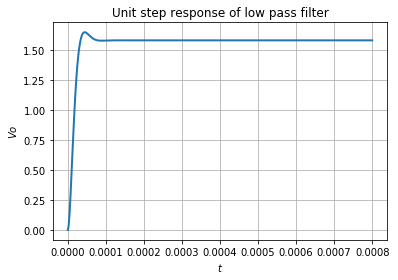

In [5]:
H=Vo*1/s
num_s,den_s=(np.array(Poly(thing,s).all_coeffs(),dtype=float) for thing in fraction(H))
tt=np.linspace(0,0.0008,1000)
t,x=sp.impulse(sp.lti(num_s,den_s),None,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$Vo$')
plt.title("Unit step response of low pass filter")
plt.show()

## Question 2

Here, the input is  $$ (sin(2000\pi t)+cos(2*10^6 \pi t))u(t)$$

We need to determine the output voltage $v_0(t)$.
We can calculate it by convoluting the transfer function with input voltage using sp.lsim

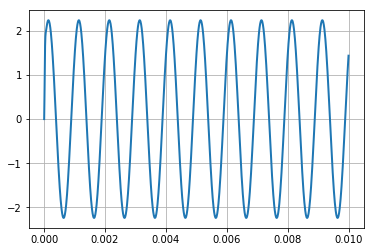

In [41]:
num_s,den_s=(np.array(Poly(thing,s).all_coeffs(),dtype=float) for thing in fraction(Vo))
tt=np.linspace(0,0.01,1000)
Vi=np.sin(2000*np.pi*tt)+np.cos(2000000*np.pi*tt)
t,x,svec=sp.lsim(sp.lti(num_s,den_s),Vi,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.show()

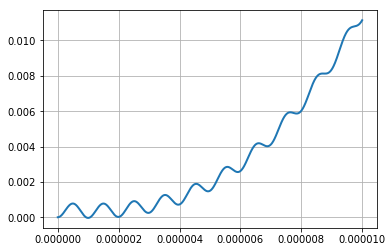

In [42]:
tt=np.linspace(0,0.00001,1000)
Vi=np.sin(2000*np.pi*tt)+np.cos(2000000*np.pi*tt)
t,x,svec=sp.lsim(sp.lti(num_s,den_s),Vi,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.show()

Because it is a low pass filter, we can say that high frequency cosine term is attenuated and low frequency sine term is not. 

## Question 3
Let us write the nodal equations and form a matrix from which all the unknown voltages can be found.

In [43]:
def highpass(C1,C2,R1,R3,G,Vi):
    s=symbols('s')
    A=Matrix([[0,0,1,-1/G],[(-s*C2*R3)/(1+s*R3*C2),1,0,0],[0,-1000,1000,1],[-s*C1-s*C2-1/R1,s*C2,0,1/R1]])
    b=Matrix([0,0,0,-Vi*s*C1])
    V=A.inv()*b
    return A,b,V

1.0e-11*s**2/(6.31517023959647e-12*s**2 + 8.94551071878941e-7*s + 0.0631517023959647)


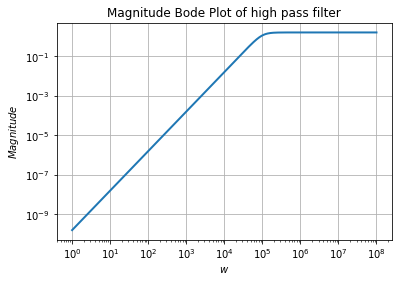

In [44]:
A,b,V=highpass(1e-9,1e-9,10000,10000,1.586,1)
s=symbols('s')
Vo=V[3]
print(simplify(Vo))
Vo=simplify(Vo)
w=np.logspace(0,8,801)
ss=1j*w
hf=lambdify(s,Vo,'numpy')
v=hf(ss)
plt.loglog(w,abs(v),lw=2)
plt.xlabel("$w$")
plt.ylabel("$Magnitude$")
plt.title("Magnitude Bode Plot of high pass filter")
plt.grid(True)
plt.show()

In [ ]:
num_s,den_s=(np.array(Poly(thing,s).all_coeffs(),dtype=float) for thing in fraction(Vo))
tt=np.linspace(0,0.01,1000)
Vi=np.sin(2000*np.pi*tt)+np.cos(2000000*np.pi*tt)
t,x,svec=sp.lsim(sp.lti(num_s,den_s),Vi,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.show()

We can see that low frequency terms are getting attenuated and only high frequency terms are not.
## Question 4
Same as Question 2, we can find the output of damped sinusoid by using sp.lsim (Convolution in time domain)

[1.e-11 0.e+00 0.e+00] [6.31517024e-12 8.94551072e-07 6.31517024e-02]


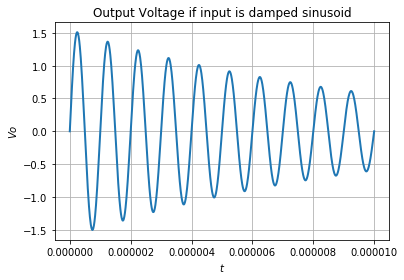

In [34]:
num_s,den_s=(np.array(Poly(thing,s).all_coeffs(),dtype=float) for thing in fraction(Vo))
print(num_s,den_s)
tt=np.linspace(0,0.00001,1000)
Vi=np.exp(-100000*tt)*np.sin(2*10**6*np.pi*tt)
t,x,svec=sp.lsim(sp.lti(num_s,den_s),Vi,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$Vo$')
plt.title("Output Voltage if input is damped sinusoid")
plt.show()

## Question 5
As mentioned in the question, let us set the Vi value as 1/s, which signifies input is a step function. After using sp.impulse on the Vo(s), we get the time-domain step response.

In [35]:
s=symbols('s')
A,b,V=highpass(1e-9,1e-9,10000,10000,1.586,1/s)
Vo=V[3]
print(simplify(Vo))
Vo=simplify(Vo)

1.0e-11*s/(6.31517023959647e-12*s**2 + 8.94551071878941e-7*s + 0.0631517023959647)


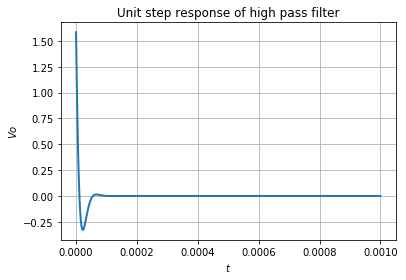

In [36]:
num_s,den_s=(np.array(Poly(thing,s).all_coeffs(),dtype=float) for thing in fraction(Vo))
tt=np.linspace(0,0.001,8001)
t,x=sp.impulse(sp.lti(num_s,den_s),None,tt)
plt.plot(t,x,lw=2)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$Vo$')
plt.title("Unit step response of high pass filter")
plt.show()